### Eart 116 Hydrology
#### Lab 6, Hydrographs and Hydrologic Computing

Scientific coding is an important skill to hone.

We will be utilizing a programming langauge called R! No it wasn't developed by pirates (sorry had to)! R is orginally a statistical computing langauge first developed in the early 90's. Today R is one of the most widely used languages in STEM computing. A big key to the R langauge's success is that it is an "open-source" code, that means that developers, scienctists, or your grandma could write a package of code and contribute to the development of R. Additionally, R is free, everyone likes free!

![](pirate.png)

Today, we will be using open source R packages from the USGS to learn about stream flow. I will include links where I can to the packages if you are interested!

Lets get started!

First, a quick an easy tutorial on assigning variables.
%%HTML
<div id="hidestuff">  
    <script type="text/javascript">
        // clever, you found my secret stash
        $('div .cell').has('#hidestuff').hide();
        var read_only = ['#Cell-title'
                         ,'#Another-cell-title'];
        read_only.map(function(hide_id) {
            $('div .cell').has(hide_id).unbind('click');
            $('div .cell').has(hide_id).unbind('dblclick');
        });
    </script>
</div>  

## First, we need to load the packages that we will be using today.

As with any coding language, you need to setup your environment. An analogy that I will be leaning on today is cooking. Loading packages is like getting out the applicances neccesacy to make cookies. We will need the mixer and the oven so we will load those packages. Loading more packages than you need will clutter the kitchen (code) and make your code run very slow. 

In [10]:
#####Load packages here####
library(ggplot2)
library(reshape2)
library(dataRetrieval) #This is the open source package from the USGS "dataRetreival"
source("functions/functions.R") # These are pre-canned functions that I have made. Look in the functions folder if you are interested in these.

The first thing we will be doing is downloading all the data that we will be using today. As you remember from previous labs, downloading hydrologic data manually can be time consuming and confusing. These commands make it easy and formats your data into easy to use tables.

An example of the function is below

site_name = readNWISdata(sites='sitenumber',service='typeofdata',startDate="YYYY-MM-DD",endDate="YYYY-MM-DD")

Where:
site_name = is the name of your site. This must be unique and make sense to anyone who might use (or grade) your code in the future.
sitenumber = the site number deliniated by the usgs. MUST BE IN QUOTES
service = this is the type of data you want to use. In our case we will be using daily values which can be specified by service='dv' .
startDate = the day you want to begin pulling your streamflow data from. MUST BE IN QUOTES and the format is "YYYY-MM-DD" . So September 30, 1980 would be "1980-09-30"
endDate = pretty self explanitory


In the code box below I have given you an example line of code pulling in data from the Piedra River Gauge '093498800". 

Use the next 3 lines of code to read in the streaflow data from the 3 following sites for WY2018:
- 09402000
- 07010000
- 09380000

In [ ]:
piedra = ap_readNWISdata(sites='09349800',service='dv',startDate="2017-10-01",endDate="2018-09-30")

### site2
site2name = ap_readNWISdata(sites='sitenumber',service='dv',startDate="YYYY-MM-DD",endDate="YYYY-MM-DD")

### site3
site3name = ap_readNWISdata(sites='sitenumber',service='dv',startDate="YYYY-MM-DD",endDate="YYYY-MM-DD")

### site4
site4name = ap_readNWISdata(sites='sitenumber',service='dv',startDate="YYYY-MM-DD",endDate="YYYY-MM-DD")

In [ ]:
piedra = ap_readNWISdata(sites='09349800',service='dv',startDate="2017-10-01",endDate="2018-09-30")
lcolo = ap_readNWISdata(sites='09402000',service='dv',startDate="2017-10-01",endDate="2018-09-30")
miss = ap_readNWISdata(sites='07010000',service='dv',startDate="2017-10-01",endDate="2018-09-30")
gc = ap_readNWISdata(sites='09380000',service='dv',startDate="2017-10-01",endDate="2018-09-30")

In [ ]:
ap_plot(piedra,lcolo,miss,gc)

## Question 1

#### Input answer here by double clicking this box and typing below. Once you are satisfied with your answer click the next button at the top of the jupyter notebook or shift+enter to render this cell! You can always reenter this box by double clicking on it again.


### Getting Data For Multiple WY: Looking at Seasonality

In [13]:
f = ap_multiyear(sites='09402000',service='dv',startDate='2017-10-01',endDate='2018-09-30')

Warning message in cbind(gauge, tmp):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(gauge, tmp):
“number of rows of result is not a multiple of vector length (arg 2)”

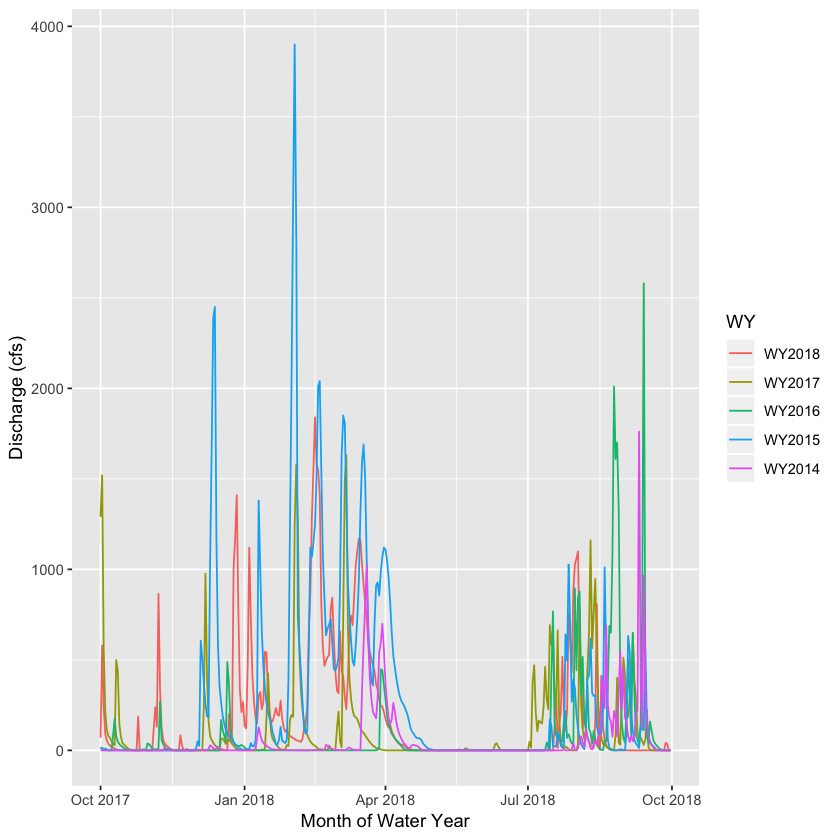

In [14]:
ap_multiyear_plot(f)

Maximum Values

In [32]:
piedra = readNWISpeak(siteNumber='09349800')
lcolo = readNWISpeak(siteNumber='09402000')
miss = readNWISpeak(siteNumber='07010000')
gc = readNWISpeak(siteNumber='09380000')

Some dates could not be converted to a valid date, and were returned as NA


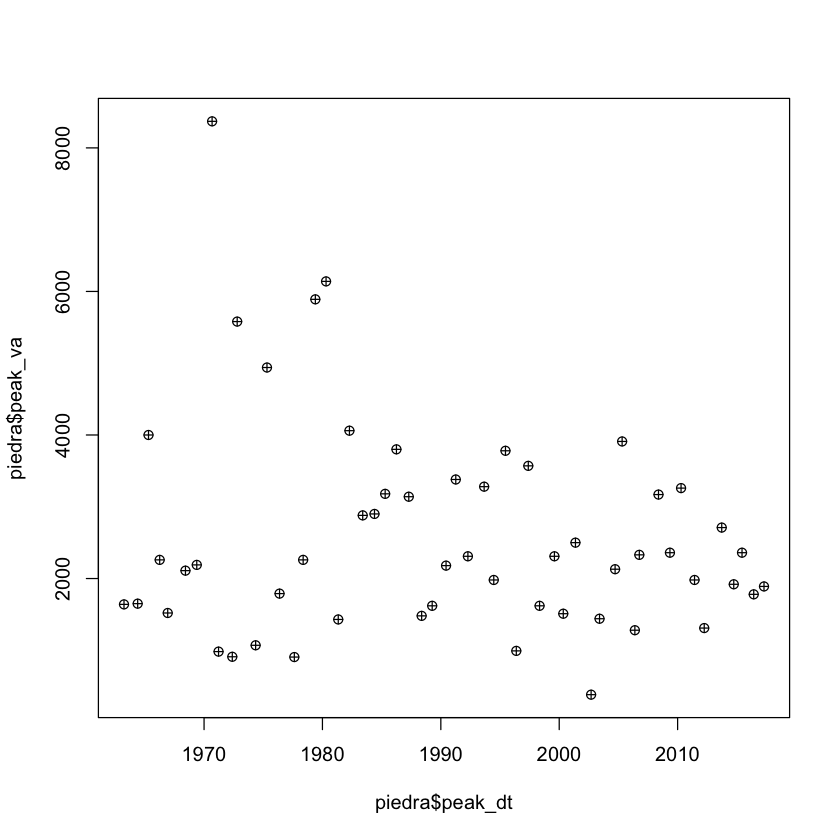

In [38]:
plot(piedra$peak_dt,piedra$peak_va,pch=10)


Box Plots and Statistics

In [18]:
piedra = ap_readNWISdata(sites='09349800',service='dv',startDate="2007-10-01",endDate="2018-09-30")
lcolo = ap_readNWISdata(sites='09402000',service='dv',startDate="2007-10-01",endDate="2018-09-30")
miss = ap_readNWISdata(sites='07010000',service='dv',startDate="2007-10-01",endDate="2018-09-30")
gc = ap_readNWISdata(sites='09380000',service='dv',startDate="2007-10-01",endDate="2018-09-30")

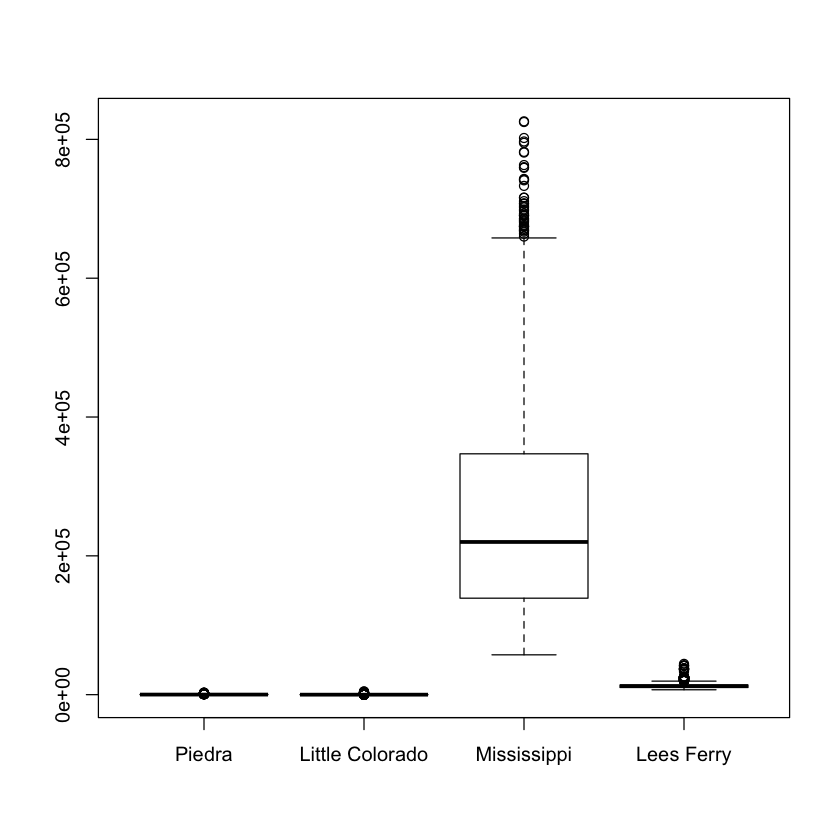

In [29]:
boxplot(piedra,lcolo,miss,gc,names = c('Piedra','Little Colorado','Mississippi','Lees Ferry'))